Ex 1

In [264]:
import numpy as np

In [4]:
v1 = np.array([3,1,-2,4])
v2 = np.array([-1,3,4,2])

In [9]:
np.dot(v1,v2)

0

Given vectors are ortogonal, because their product is equal to zero.

Ex 2

In [14]:
A = np.array([[2,3],[1,2]])
print(A)

[[2 3]
 [1 2]]


In [13]:
A_inv = np.linalg.inv(A)

print(A_inv)

[[ 2. -3.]
 [-1.  2.]]


In [15]:
print(np.dot(A,A_inv))

[[1. 0.]
 [0. 1.]]


Indeed, matrix A_inv is the inversion of the A, because A x A_inv = 1.

Ex 3

In [18]:
A = np.array([[1,2,1],
              [3,0,1],
              [0,2,4]])

In [17]:
B = np.array([[-1,0,1],
              [2,1,0],
              [3,-2,1]])

In [24]:
result = np.dot(A,B) + np.transpose(B)
result

array([[ 5,  2,  5],
       [ 0, -1,  2],
       [17, -6,  5]])

Ex 4

In [263]:
import matplotlib.pyplot as plt

In [28]:
x = np.linspace(-2,2,10) #domain, from -2 to 2, 10 numbers   
y = 3*x-3           #function

In [54]:
xy_mx = np.cov(x,y) #covariance matrix for variables X and Y
xy_mx

array([[7.72880318e-01, 3.33320783e+01],
       [3.33320783e+01, 1.48993769e+03]])

In [53]:
corr1 = xy_mx[0,1]/((xy_mx[0,0]**0.5)*(xy_mx[1,1]**0.5))
corr1

0.9822504061402936

Correlation is 0.029

Ex 5

In [37]:
x = np.linspace(2,5,100)

In [38]:
y = []
for i in x:
    y_val = i**3 + 5 * i
    y.append(y_val)

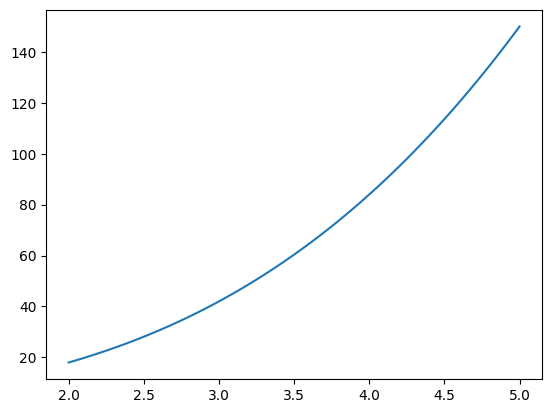

In [40]:
plt.plot(x,y)

In [56]:
cov_mx = np.cov(x,y)
cov_mx

array([[7.72880318e-01, 3.33320783e+01],
       [3.33320783e+01, 1.48993769e+03]])

In [58]:
corr2 = cov_mx[0,1]/((cov_mx[0,0]**0.5)*(cov_mx[1,1]**0.5))
corr2

0.9822504061402936

Correlation is equal to 0.98

Ex 6

In [262]:
import math

In [76]:
v3 = np.array([-3, 4])

In [77]:
cos_rad = math.radians(30)
cos = math.cos(cos_rad)
cos

0.8660254037844387

In [78]:
sin_rad = math.radians(30)
sin = math.sin(sin_rad)
sin

0.49999999999999994

In [89]:
angle_rot = np.array([[cos,  sin],
                     [-sin, cos]])
angle_rot

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

In [88]:
v4 = np.dot(v3, angle_rot)
v4

array([-4.59807621,  1.96410162])

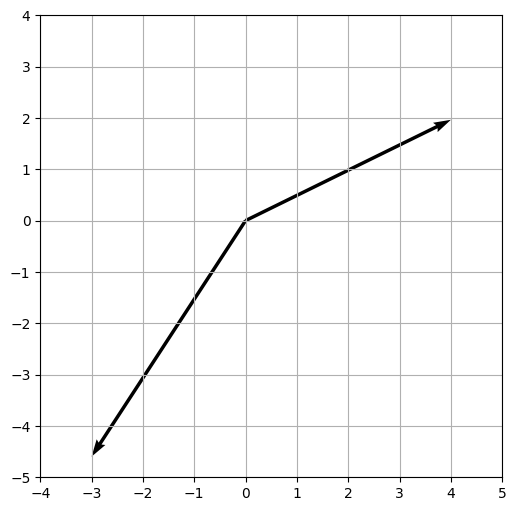

In [ ]:
X = np.array([0,0]) 

fig, ax = plt.subplots(figsize=(6, 6))
ax.quiver(X, X, v3, v4, units= 'xy', scale=1)
ax.grid()
plt.xlim(-4,5)
plt.ylim(-5,4)
ax.set_aspect('equal')
plt.show()

Ex 7

In [118]:
!pip install scipy

In [261]:
import scipy.stats as stats

In [120]:
p1 = stats.norm.cdf(1)
print("P(X < 1) = ", p1)

P(X < 1) =  0.8413447460685429


In [121]:
p2 = 1 - stats.norm.cdf(1)
print("P(X > 1) = ", p2)

P(X > 1) =  0.15865525393145707


In [122]:
p3 = stats.norm.cdf(2) - stats.norm.cdf(-1)
print("P(-1 < X < 2) = ", p3)

P(-1 < X < 2) =  0.8185946141203637


Ex 8

In [123]:
mu = 170
sigma = 10

In [124]:
x1 = 160
x2 = 190

In [125]:
z1 = (x1 - mu) / sigma
z2 = (x2 - mu) / sigma

In [126]:
p = stats.norm.cdf(z2) - stats.norm.cdf(z1)

In [127]:
percent = p * 100
percent

81.85946141203637

Ex 9

In [239]:
def pdf_2d_normal(X, means, sigma_cov):
    """
    Calculate the probability density function of a 2D normal distribution.
    """
    det_cov = np.linalg.det(sigma_cov)
    inv_cov = np.linalg.inv(sigma_cov)
    diff = X - means
    return (1 / (2 * np.pi * np.sqrt(det_cov))) * np.exp(-0.5 * np.dot(np.dot((np.transpose(diff)),inv_cov), diff))

Ex 10

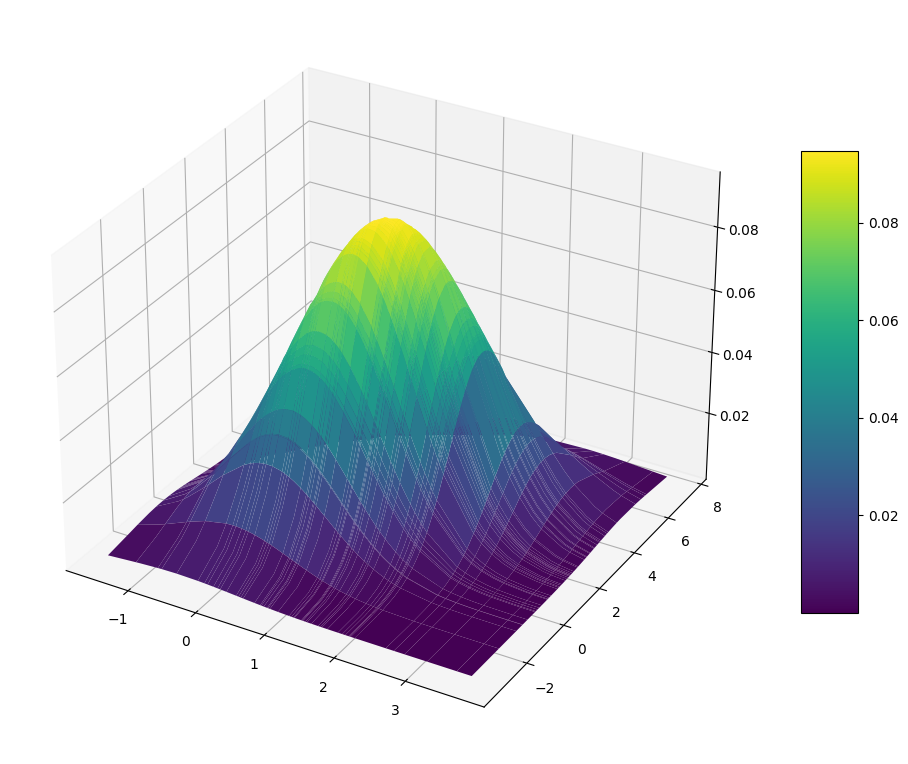

In [298]:
# First method
means = np.array([1,2])
sigma_cov = np.array([[1,1.1],[1.1,4]])
data = np.random.multivariate_normal(means, sigma_cov, 100)

x1, y1 = (np.sort(i.flatten()) for i in np.hsplit(data, 2))
X, Y = np.meshgrid(x1, y1)
Z = np.apply_along_axis(pdf_2d_normal, 2, np.dstack((X, Y)), means, sigma_cov)

fig = plt.figure(figsize=(12, 12), dpi=100)
ax = plt.axes(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis)
fig.colorbar(surf, shrink=0.5, aspect=8)
plt.show()

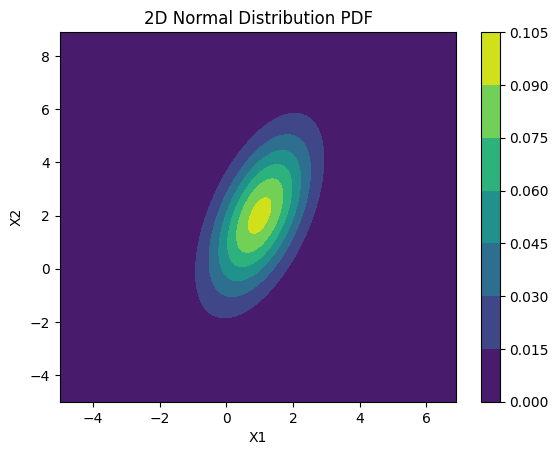

In [297]:
# Second method 
from scipy.stats import multivariate_normal
import matplotlib as mpl

# Define the mean and covariance matrix
mu = np.array([1, 2])
cov = np.array([[1, 1.1], [1.1, 4]])

# Create a grid of points to evaluate the PDF at
x, y = np.mgrid[-5:7:.1, -5:9:.1]
pos = np.dstack((x, y))

# Evaluate the PDF at each point on the grid
pdf = multivariate_normal(means, sigma_cov).pdf(pos)

# Plot the PDF as a contour plot
plt.contourf(x, y, pdf, cmap="viridis")
plt.colorbar()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2D Normal Distribution PDF')
plt.show()